## Battle of Neighbourhood (WEEK 2)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read crime records data
crime = pd.read_csv('https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv')
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201711,201712,201801,201802,201803,201804,201805,...,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910
0,Arson and Criminal Damage,Arson,Barking and Dagenham,7,4,2,3,6,3,4,...,5,2,5,5,11,3,5,3,6,9
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,108,119,135,111,115,122,126,...,97,127,138,130,138,113,134,118,109,105
2,Burglary,Burglary - Business and Community,Barking and Dagenham,27,21,38,33,38,36,24,...,45,24,29,27,22,27,31,35,37,30
3,Burglary,Burglary - Residential,Barking and Dagenham,88,124,143,134,122,75,93,...,114,107,99,96,114,96,71,67,80,95
4,Drug Offences,Drug Trafficking,Barking and Dagenham,5,6,4,5,7,3,8,...,5,1,6,4,8,6,7,6,6,9


In [3]:
# rename the column "LookUp_BoroughName"
crime.rename(columns={"LookUp_BoroughName": "BoroughName"}, inplace=True)
crime.head()

,MajorText,MinorText,BoroughName,201711,201712,201801,201802,201803,201804,201805,...,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910
0,Arson and Criminal Damage,Arson,Barking and Dagenham,7,4,2,3,6,3,4,...,5,2,5,5,11,3,5,3,6,9
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,108,119,135,111,115,122,126,...,97,127,138,130,138,113,134,118,109,105
2,Burglary,Burglary - Business and Community,Barking and Dagenham,27,21,38,33,38,36,24,...,45,24,29,27,22,27,31,35,37,30
3,Burglary,Burglary - Residential,Barking and Dagenham,88,124,143,134,122,75,93,...,114,107,99,96,114,96,71,67,80,95
4,Drug Offences,Drug Trafficking,Barking and Dagenham,5,6,4,5,7,3,8,...,5,1,6,4,8,6,7,6,6,9


In [4]:
# Names of Boroughs
crime['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [5]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,BoroughName,Sum,201711,201712,201801,201802,201803,201804,...,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910
0,Arson and Criminal Damage,Arson,Barking and Dagenham,123,7,4,2,3,6,3,...,5,2,5,5,11,3,5,3,6,9
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2827,108,119,135,111,115,122,...,97,127,138,130,138,113,134,118,109,105
2,Burglary,Burglary - Business and Community,Barking and Dagenham,742,27,21,38,33,38,36,...,45,24,29,27,22,27,31,35,37,30
3,Burglary,Burglary - Residential,Barking and Dagenham,2436,88,124,143,134,122,75,...,114,107,99,96,114,96,71,67,80,95
4,Drug Offences,Drug Trafficking,Barking and Dagenham,142,5,6,4,5,7,3,...,5,1,6,4,8,6,7,6,6,9


In [6]:
# Remove unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,BoroughName,Sum
0,Barking and Dagenham,123
1,Barking and Dagenham,2827
2,Barking and Dagenham,742
3,Barking and Dagenham,2436
4,Barking and Dagenham,142


In [7]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['BoroughName'], as_index=False).sum()
crime.head()

,BoroughName,Sum
0,Barking and Dagenham,38070
1,Barnet,58693
2,Bexley,32888
3,Brent,61202
4,Bromley,47676


In [8]:
# convert the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1586.250000
1,Barnet,2445.541667
2,Bexley,1370.333333
3,Brent,2550.083333
4,Bromley,1986.500000


In [9]:
# Explore the clean dataset - find borough with most incidents?
crime.sort_values(by='MonthlyAverage', ascending=False).head()

,BoroughName,MonthlyAverage
32,Westminster,5895.708333
5,Camden,3119.541667
27,Southwark,3118.041667
24,Newham,3006.958333
20,Lambeth,2961.083333


In [10]:
# Explore the clean dataset - find borough with least incidents?
crime.sort_values(by='MonthlyAverage', ascending=True).head()

,BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,289.958333
19,Kingston upon Thames,1056.791667
26,Richmond upon Thames,1058.625000
28,Sutton,1064.333333
23,Merton,1176.875000


### List of London Boroughs
Information about boroughs and their population & coordinates:

-Population can be used to calcuate the ratio of reported crime to population for better comparison.

-Coordinates can be used to get neighborhood data from Foursquare.

source: Wikipedia

In [11]:
import requests
import lxml
from bs4 import BeautifulSoup

In [12]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XdenswpAMEkAABQkMUoAAACU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":881899861,"wgRevisionId":881899861,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015

In [13]:
#Gather the data for Borough
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [14]:
#Form a new dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [15]:
# Remove unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [16]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [17]:
# Further clean on coordinates
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [18]:
# Remove the borough name in the coordinates
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [19]:
# Names of Boroughs
info['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

List of top 50 popular places in the neighborhood

In [20]:
# Foursquare credentials
CLIENT_ID = 'YQWSFRHHQZEUEZE5QL5B1TJNISXS2AD5V5BZ2HJ4SPCMXFMQ' # your Foursquare ID
CLIENT_SECRET = 'NYLBUF2QDSCNOVMLTUQHUYYUQ2UUCJVVIKRGQPGBZ3LFUZPS' # your Foursquare Secret
VERSION = '20191201' # Foursquare API version

In [21]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [23]:
print(venues.shape)
venues.head()

(1140, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons Becontree Heath,51.559774,0.148752,Supermarket


Exploratory Analysis

In [24]:
#Review our data
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1586.250000
1,Barnet,2445.541667
2,Bexley,1370.333333
3,Brent,2550.083333
4,Bromley,1986.500000


In [25]:
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [26]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons Becontree Heath,51.559774,0.148752,Supermarket


In [27]:
import matplotlib.pyplot as plt

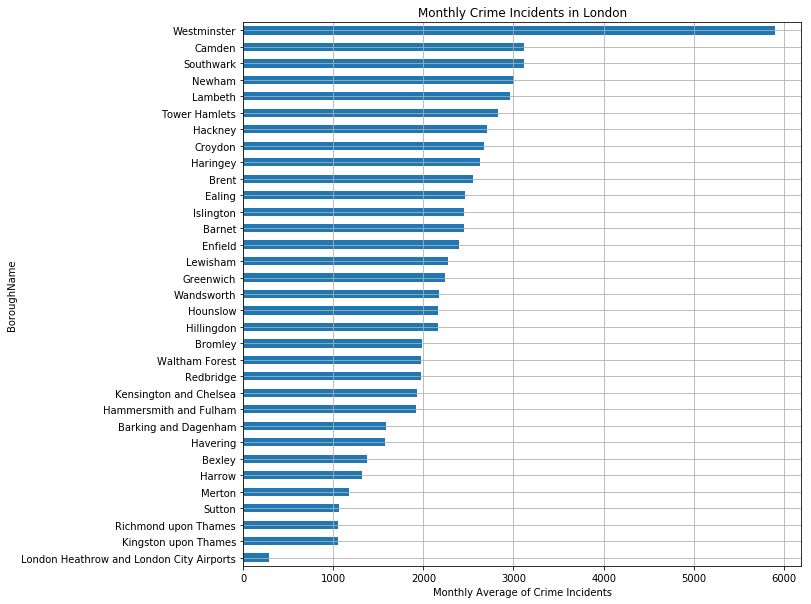

In [28]:
#Visualize crime data
crime.set_index('BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

In [29]:
#Drop London Heathrow Airport since it is not a residential area & not included in population data
crime.drop([22], inplace=True)

In [30]:
#Combine crime data and information data
df = pd.merge(crime,info, how='outer', on='BoroughName')
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,1586.250000,194352,51.5607,0.1557
1,Barnet,2445.541667,369088,51.6252,-0.1517
2,Bexley,1370.333333,236687,51.4549,0.1505
3,Brent,2550.083333,317264,51.5588,-0.2817
4,Bromley,1986.500000,317899,51.4039,0.0198


In [31]:
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [32]:
#Convert the data type
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [34]:
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1586.250000,194352,51.5607,0.1557,8.161737
1,Barnet,2445.541667,369088,51.6252,-0.1517,6.625904
2,Bexley,1370.333333,236687,51.4549,0.1505,5.789643
3,Brent,2550.083333,317264,51.5588,-0.2817,8.037733
4,Bromley,1986.500000,317899,51.4039,0.0198,6.248840


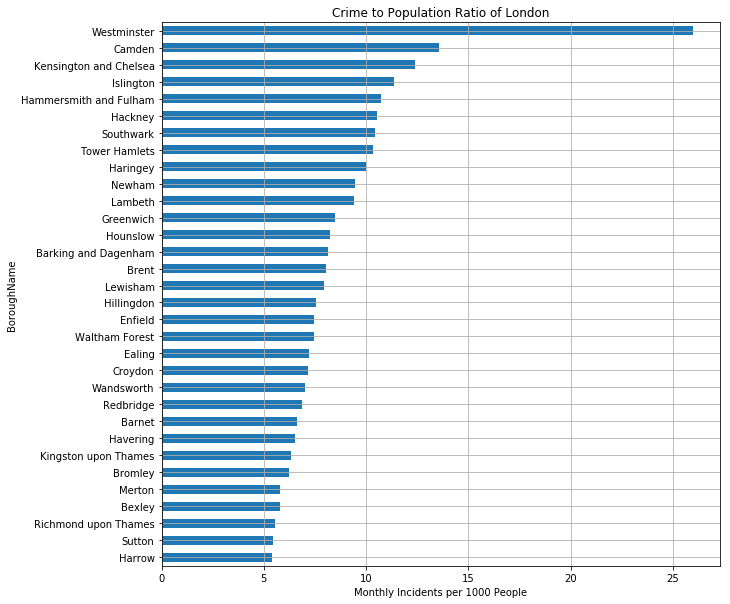

In [35]:

#Visualize crime rate per 1000 people
df.set_index('BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [36]:
!conda install -c conda-forge folium=0.5.0

!pip install folium
import folium
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    altair-3.3.0               |           py36_0         747 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

In [37]:
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [38]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

### Cluster Analysis

In [39]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 182 uniques categories.


In [40]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [41]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
onehot.shape

(1140, 183)

In [43]:
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.000000,...,0.00,0.0000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.000000,0.00
1,Barnet,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.000000,...,0.00,0.0000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.000000,0.00
2,Bexley,0.00000,0.000000,0.000000,0.000000,0.034483,0.00,0.0000,0.00,0.000000,...,0.00,0.0000,0.034483,0.00000,0.034483,0.00,0.00,0.00,0.000000,0.00
3,Brent,0.00000,0.000000,0.000000,0.000000,0.040000,0.00,0.0000,0.00,0.020000,...,0.00,0.0000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.000000,0.00
4,Bromley,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.025000,...,0.00,0.0000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.025000,0.00
5,Camden,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.000000,...,0.02,0.0000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.000000,0.00
6,Croydon,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.048780,...,0.00,0.0000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.000000,0.00
7,Ealing,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.0200,0.00,0.020000,...,0.00,0.0000,0.020000,0.04000,0.000000,0.02,0.00,0.00,0.000000,0.00
8,Enfield,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.000000,...,0.04,0.0000,0.020000,0.00000,0.000000,0.00,0.00,0.00,0.040000,0.00
9,Greenwich,0.02381,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.00,0.023810,...,0.00,0.0000,0.000000,0.02381,0.023810,0.00,0.00,0.00,0.000000,0.00


In [44]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
               venue  freq
0               Park  0.14
1               Pool  0.14
2        Supermarket  0.14
3        Golf Course  0.14
4  Martial Arts Dojo  0.14


----Barnet----
                   venue  freq
0                   Café  0.67
1               Bus Stop  0.33
2     African Restaurant  0.00
3  Performing Arts Venue  0.00
4           Optical Shop  0.00


----Bexley----
                  venue  freq
0                   Pub  0.10
1        Clothing Store  0.10
2  Fast Food Restaurant  0.07
3              Pharmacy  0.07
4           Coffee Shop  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.06
3        Grocery Store  0.06
4  Sporting Goods Shop  0.06


----Bromley----
                  venue  freq
0           Coffee Shop  0.12
1        Clothing Store  0.12
2           Pizza Place  0.05
3  Gym / Fitness Center  0.05
4                   Bar  0.05


----Camden----
    

In [45]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Bus Station,Pool,Supermarket,Park,Gym / Fitness Center,Golf Course,Martial Arts Dojo,Yoga Studio,English Restaurant,Fish Market
1,Barnet,Café,Bus Stop,Yoga Studio,Falafel Restaurant,French Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
2,Bexley,Pub,Clothing Store,Italian Restaurant,Supermarket,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Coffee Shop,Hotel,Grocery Store
3,Brent,Coffee Shop,Hotel,Grocery Store,Clothing Store,Sporting Goods Shop,Sandwich Place,Bar,American Restaurant,Latin American Restaurant,Indian Restaurant
4,Bromley,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Portuguese Restaurant,Stationery Store,Department Store,Furniture / Home Store


In [46]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [47]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([0, 2, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [48]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1586.250000,194352,51.5607,0.1557,8.161737,0,Bus Station,Pool,Supermarket,Park,Gym / Fitness Center,Golf Course,Martial Arts Dojo,Yoga Studio,English Restaurant,Fish Market
1,Barnet,2445.541667,369088,51.6252,-0.1517,6.625904,2,Café,Bus Stop,Yoga Studio,Falafel Restaurant,French Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant
2,Bexley,1370.333333,236687,51.4549,0.1505,5.789643,3,Pub,Clothing Store,Italian Restaurant,Supermarket,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Coffee Shop,Hotel,Grocery Store
3,Brent,2550.083333,317264,51.5588,-0.2817,8.037733,3,Coffee Shop,Hotel,Grocery Store,Clothing Store,Sporting Goods Shop,Sandwich Place,Bar,American Restaurant,Latin American Restaurant,Indian Restaurant
4,Bromley,1986.500000,317899,51.4039,0.0198,6.248840,3,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Portuguese Restaurant,Stationery Store,Department Store,Furniture / Home Store


In [49]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [50]:
# Cluster 1: business area (Coffee shops, Hotel, Market)
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,8.161737,0,Bus Station,Pool,Supermarket,Park,Gym / Fitness Center,Golf Course,Martial Arts Dojo,Yoga Studio,English Restaurant,Fish Market


In [51]:
# Cluster 2: Recreation area (Park, Cafe)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,8.239109,1,Chinese Restaurant,Bed & Breakfast,Café,Park,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [52]:
# Cluster 3: Transportation (Cafe, Bus stop)
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.625904,2,Café,Bus Stop,Yoga Studio,Falafel Restaurant,French Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [53]:
# Cluster 4: Catering area(Pubs, Coffee shops, Restaurant)
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,5.789643,3,Pub,Clothing Store,Italian Restaurant,Supermarket,Furniture / Home Store,Fast Food Restaurant,Pharmacy,Coffee Shop,Hotel,Grocery Store
3,Brent,8.037733,3,Coffee Shop,Hotel,Grocery Store,Clothing Store,Sporting Goods Shop,Sandwich Place,Bar,American Restaurant,Latin American Restaurant,Indian Restaurant
4,Bromley,6.248840,3,Coffee Shop,Clothing Store,Bar,Pizza Place,Burger Joint,Gym / Fitness Center,Portuguese Restaurant,Stationery Store,Department Store,Furniture / Home Store
5,Camden,13.579816,3,Hotel,Café,Coffee Shop,Hotel Bar,Breakfast Spot,Train Station,Pizza Place,Deli / Bodega,Sandwich Place,Restaurant
6,Croydon,7.160145,3,Coffee Shop,Pub,Gym / Fitness Center,Asian Restaurant,Italian Restaurant,Hotel Bar,Burger Joint,Burrito Place,Bus Stop,Café
7,Ealing,7.202438,3,Coffee Shop,Italian Restaurant,Pub,Park,Clothing Store,Pizza Place,Burger Joint,Vietnamese Restaurant,Hotel,Caribbean Restaurant
8,Enfield,7.457190,3,Coffee Shop,Clothing Store,Optical Shop,Café,Shopping Mall,Supermarket,Sandwich Place,Restaurant,Pub,Stationery Store
9,Greenwich,8.483013,3,Coffee Shop,Supermarket,Fast Food Restaurant,Pub,Clothing Store,Grocery Store,Plaza,Sandwich Place,Hotel,African Restaurant
10,Hackney,10.514164,3,Pub,Café,Bakery,Coffee Shop,Cocktail Bar,Clothing Store,Brewery,Grocery Store,Vietnamese Restaurant,Burger Joint
11,Hammersmith and Fulham,10.742135,3,Pub,Indian Restaurant,Italian Restaurant,Clothing Store,Gastropub,Japanese Restaurant,Café,Boarding House,Indian Chinese Restaurant,Portuguese Restaurant


In [54]:
# Cluster 5: Travelling area(Pool, Parks)
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Harrow,5.405648,4,Indian Restaurant,Convenience Store,Coffee Shop,Supermarket,Thai Restaurant,Yoga Studio,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop


### 4. Results and Recommendations
Now we will review all the analysis made in this project before we make a conclusion on which area to live as an international student or invest as a student accommodation builder.

Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.

### Safety

In [55]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

,BoroughName,CrimeToPop,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,25.990488,5895.708333,226841,51.4973,-0.1372,3,Hotel,Coffee Shop,Sandwich Place,Theater,Sushi Restaurant,Hotel Bar,Sporting Goods Shop,Diner,Salad Place,Café
5,Camden,13.579816,3119.541667,229719,51.5290,-0.1255,3,Hotel,Café,Coffee Shop,Hotel Bar,Breakfast Spot,Train Station,Pizza Place,Deli / Bodega,Sandwich Place,Restaurant
18,Kensington and Chelsea,12.386939,1927.333333,155594,51.5020,-0.1947,3,Café,Juice Bar,Clothing Store,French Restaurant,Garden,Bakery,English Restaurant,Burger Joint,Restaurant,Gym / Fitness Center
17,Islington,11.383483,2455.041667,215667,51.5416,-0.1022,3,Pub,Bakery,Cocktail Bar,Middle Eastern Restaurant,French Restaurant,Mediterranean Restaurant,Furniture / Home Store,Theater,Boutique,Music Venue
11,Hammersmith and Fulham,10.742135,1919.458333,178685,51.4927,-0.2339,3,Pub,Indian Restaurant,Italian Restaurant,Clothing Store,Gastropub,Japanese Restaurant,Café,Boarding House,Indian Chinese Restaurant,Portuguese Restaurant
10,Hackney,10.514164,2706.125000,257379,51.5450,-0.0553,3,Pub,Café,Bakery,Coffee Shop,Cocktail Bar,Clothing Store,Brewery,Grocery Store,Vietnamese Restaurant,Burger Joint
26,Southwark,10.446961,3118.041667,298464,51.5035,-0.0804,3,Pub,Hotel,Coffee Shop,English Restaurant,Hotel Bar,Thai Restaurant,Theater,Bar,Art Gallery,French Restaurant
28,Tower Hamlets,10.354294,2825.583333,272890,51.5099,-0.0059,3,Italian Restaurant,Pizza Place,Hotel,Café,Coffee Shop,Chinese Restaurant,Convenience Store,Outdoor Sculpture,Gym / Fitness Center,English Restaurant
12,Haringey,9.990723,2631.416667,263386,51.6000,-0.1119,3,Fast Food Restaurant,Café,Italian Restaurant,Supermarket,Hotel Bar,Gym / Fitness Center,Grocery Store,Mediterranean Restaurant,Movie Theater,Park
23,Newham,9.449099,3006.958333,318227,51.5077,0.0469,3,Hotel,Currency Exchange,Sandwich Place,Light Rail Station,Chinese Restaurant,Rafting,Pharmacy,Airport Service,Airport Lounge,Airport


### Atmosphere

In [56]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Barking and Dagenham'], dtype=object)

According to my interpretation, Cluster 2 is 'Recreation area' with Park, Cafe as popular places.

In [57]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Hounslow'], dtype=object)

According to my interpretation, Cluster 3 is 'Transportation area' with Cafe, Bus stop as popular places.

In [58]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Barnet'], dtype=object)

According to my interpretation, Cluster 4 is 'Catering area' with Pubs, Coffee shops, Restaurant as popular places.

In [59]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing',
       'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
       'Haringey', 'Havering', 'Hillingdon', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)


According to my interpretation, Cluster 5 is 'Travelling area' with Pool, Parks as popular places.

In [60]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Harrow'], dtype=object)

Now, what kind of atmosphere students may prefer vary among students. So using my personal preferance as a student moving to London and some common sense, I will give scores to each clusters. I have decided to give preference in the order of Business Area, Recreation Area, Transportation Area, Catering Area, and Travelling Area.

### Conclusion

Based on previous analysis, we can conclude that the five placed below are the best places to build a student dormitory in terms of safety and atmosphere. The top five boroughs all belong to catering area with Pubs, Coffee shops, Restaurant.

In [61]:
df_top5 = df.iloc[[27,25,2,22,4],:]
df_top5

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
27,Sutton,1064.333333,195914,51.3618,-0.1945,5.432656
25,Richmond upon Thames,1058.625000,191365,51.4479,-0.3260,5.531968
2,Bexley,1370.333333,236687,51.4549,0.1505,5.789643
22,Merton,1176.875000,203223,51.4014,-0.1958,5.791052
4,Bromley,1986.500000,317899,51.4039,0.0198,6.248840


In [62]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map